### Machine Learning Workflow & Intro to Data Preperation & Feature Engineering

Slides Modified from Monique.

#### Agenda

1. Machine Learning Workflow
2. Data Preperation
    - Dealing with Outliers
    - Dealing with Null Values
    - Variable Transformations
3. Feature Engineering Overview and Examples

------------
## Machine Learning Workflow

<img src='imgs/data-science-explore.png' width=800>

- Iterative process
- Non-linear process
- Lots of judgement and refining along the way
- Lots of time spent in data prep
- "Big data": a lot of time can be spent in data retrieval

Source: Practical Machine Learning with Python, Apress/Springer

---------------
**Machine Learning Workflow**

<img src='imgs/data-science-explore.png' width=600>

### Data Retrieval
- SQL, APIs, Web Scraping, csv, Excel...
- Could include combining some of the above
- Also called "Data Ingestion"

------------

**Machine Learning Workflow**

<img src='imgs/data-science-explore.png' width=600>

### Data Preparation
- **Processing and Wrangling**: You became `pandas` experts last week.
- **Feature extraction and engineering**: Will go over this today. What features (i.e., variables, `x`) do I need for my problem?
- **Feature selection**: To be covered later today.

------------

**Machine Learning Workflow**

<img src='imgs/data-science-explore.png' width=600>

### Modeling (i.e., machine learning)
- `scikit-learn` being the main basic package
- Other packages for deep learning
- Supervised vs. unsupervised learning
- "Build a model"

------------

**Machine Learning Workflow**

<img src='imgs/data-science-explore.png' width=600>

### Machine Learning Algorithm
- **"Algorithm"**: series of steps based on rules that a computer takes to calculate something
- Within supervised:
    - Regression: `y` is a continuous number (e.g., price)
    - Classification: `y` is discrete (e.g., customer retained or not)
- Examples: decision trees, linear regression, neural networks
    

------------

**Machine Learning Workflow**

<img src='imgs/data-science-explore.png' width=600>

### Model Evaluation & Tuning
- Our first model will probably not be the best model; need to pick
- **Evaluation**: Using metrics to pick the best model for the use case
- **Tuning**: Besides picking between algorithms, there are 'knobs' / settings to 'tune' a model for a specific algorithm

------------

**Machine Learning Workflow**
<img src='imgs/data-science-explore.png' width=600>

### Deployment & Monitoring
- We picked a model and it's ready for use by our users
- Be careful about concept drift
- Models sometimes need to be re-trained

-----------

## Types of Questions


| Type of question | Description | Example |
|:---|:--------------------------|:----------------|
| **Descriptive** | Summarize a characteristic of a set of data| Proportion of males, the mean number of servings of fresh fruits and vegetables per day |
| **Exploratory** | Analyze the data to see if there are patterns, trends, or relationships between variables; “hypothesis-generating” analyses|If you had a general thought that diet was linked somehow to viral illnesses, start by examining relationships between a range of dietary factors and viral illnesses|
| **Inferential** | Testing a hypothesis, statistically |Analyzing data for a subset / sample of the population and generalizing insights for the general population; Is there a higher incidence of cancer for women than for men?|
| **Predictive**  | Predicting a value, not necessarily figuring out why| Predicting cancer diagnosis from x-rays using computer vision|
| **Causal**      | Whether changing one factor will change another factor | Does changing diet lead to higher incidence of cancer?|
| **Mechanistic** | Understanding *how* one factor changes another | How does diet lead to higher incidence of cancer? |

-------------------

## Data Preperation

The main goal of this phase is to prepare the data for exploratory data analysis, inferential analysis, or predeiciton (modelling). In other words, we're making sure our data is in good shape, we have treated our missing values, dealt with weird data, cleaned it up.

Common Data Preperation Techniques:
- Outlier Detection
- Handling Null Values
- Variable Transformation


### Outlier Detection and Handling Outliers

- Data is not always right
- Could be human error, could be system error
- **Outlier**: an observation point that is distant from other observations
- Helpful to pointing us what can be wrong
- **Some errors are obvious; many require interviewing the domain experts to figure out**

Note: Before deleting outliers ask yourself if this is needed, is the outlier nessecarry. It depends on your use case, your business problem, where outliers may be important. An example is fraud detection. 

### Outlier Detection: demo
- Docs: https://scikit-learn.org/stable/datasets/index.html#boston-dataset
- [Example source](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba)

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")




- CRIM per capita crime rate by town

- ZN proportion of residential land zoned for lots over 25,000 sq.ft.

- INDUS proportion of non-retail business acres per town

- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

- NOX nitric oxides concentration (parts per 10 million)

- RM average number of rooms per dwelling

- AGE proportion of owner-occupied units built prior to 1940

- DIS weighted distances to five Boston employment centres

- RAD index of accessibility to radial highways

- TAX full-value property-tax rate per $10,000

- PTRATIO pupil-teacher ratio by town

- B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

- LSTAT % lower status of the population

- MEDV Median value of owner-occupied homes in $1000’s



In [2]:
# documentation: https://scikit-learn.org/stable/datasets/toy_dataset.html#boston-dataset
boston = load_boston()
x = boston.data
y = boston.target
columns = boston.feature_names

#create the dataframe
boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


**Method 1: Summary of the data**

- Use your intuition
- Ask a domain expert

In [3]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


**Method 2: Visualizing a Single Variable**

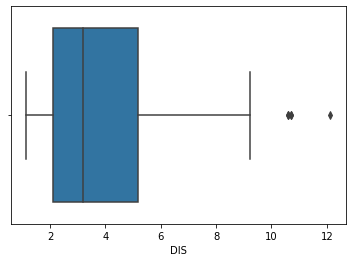

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x=boston_df['DIS']);
plt.show()

**Method 3: Visualizing Multi-Variables**

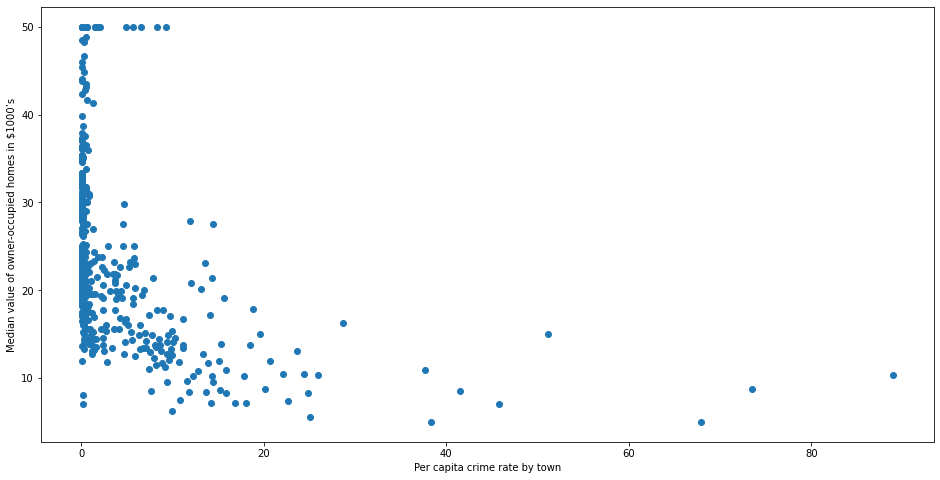

In [5]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(boston_df['CRIM'], y)
ax.set_xlabel('Per capita crime rate by town')
ax.set_ylabel('Median value of owner-occupied homes in $1000’s')
plt.show()

**Method 4: Z-Score**

A way to detect outliers is to remove values with a z-score greater than 3. The z-score is measured in terms of standard deviations from the mean.

- Z-score of 0 indicates the value is the mean
- Z-score of 1 indicates the value is within 1 standard deviation from the mean. 
- Z-score of 2 indicates the value is within 2 standard deviations from the mean.
- Z-score of 3 indicates the value is within 3 standard deviations from the mean.
- **Z-score of above 3 indicates the value is greater than 3 standard deviations from the mean. Data Scinetist often label values with a z-score above 3 as outliers.**

In [7]:
from scipy import stats

#Finding Z Score on Column
stats.zscore(boston_df['ZN'])

#Turning Absolute
np.abs(stats.zscore(boston_df['ZN']))

#(np.abs(stats.zscore(boston_df['ZN'])) > 3) 

array([0.28482986, 0.48772236, 0.48772236, 0.48772236, 0.48772236,
       0.48772236, 0.04877224, 0.04877224, 0.04877224, 0.04877224,
       0.04877224, 0.04877224, 0.04877224, 0.48772236, 0.48772236,
       0.48772236, 0.48772236, 0.48772236, 0.48772236, 0.48772236,
       0.48772236, 0.48772236, 0.48772236, 0.48772236, 0.48772236,
       0.48772236, 0.48772236, 0.48772236, 0.48772236, 0.48772236,
       0.48772236, 0.48772236, 0.48772236, 0.48772236, 0.48772236,
       0.48772236, 0.48772236, 0.48772236, 0.48772236, 2.73124524,
       2.73124524, 0.48772236, 0.48772236, 0.48772236, 0.48772236,
       0.48772236, 0.48772236, 0.48772236, 0.48772236, 0.48772236,
       0.41358857, 0.41358857, 0.41358857, 0.41358857, 2.73124524,
       3.37503876, 3.16044092, 3.80423444, 0.58526684, 0.58526684,
       0.58526684, 0.58526684, 0.58526684, 0.58526684, 0.26337008,
       2.94584308, 2.94584308, 0.04877224, 0.04877224, 0.04877224,
       0.48772236, 0.48772236, 0.48772236, 0.48772236, 0.48772

## Solution?

- Can drop the observation
- Can replace the outlier

-----------
## Handling Null Values

Many times we will be handed data with missing data or corrupted data. Most commonly, missing data are represented as NaNs. NaNs are blank elements in Pandas. 

- It can be a system error that causes missing values, or it wasn't captured.
- There are techinques to deal with missing data, but all of them are imperfect. 

Resource: https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/

### Null values: Demo
- Dataset: https://www.kaggle.com/uciml/pima-indians-diabetes-database/data#

In [8]:
import pandas as pd
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1,85,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8,183,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1,89,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0,137,40.0,35.0,168.0,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76.0,48.0,180.0,32.9,0.171,63.0,0
764,2,122,70.0,27.0,0.0,36.8,0.340,27.0,0
765,5,121,72.0,23.0,112.0,26.2,0.245,30.0,0
766,1,126,60.0,0.0,0.0,30.1,0.349,47.0,1


In [9]:
diabetes_df.isnull().sum()

Pregnancies                  0
Glucose                      0
BloodPressure               33
SkinThickness                1
Insulin                      5
BMI                         16
DiabetesPedigreeFunction     0
Age                         22
Outcome                      0
dtype: int64

In [10]:
#Check percentage of data missing for each feature/column
round(100*(diabetes_df.isnull().sum()/len(diabetes_df)),2)

Pregnancies                 0.00
Glucose                     0.00
BloodPressure               4.30
SkinThickness               0.13
Insulin                     0.65
BMI                         2.08
DiabetesPedigreeFunction    0.00
Age                         2.86
Outcome                     0.00
dtype: float64

In [11]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             735 non-null    float64
 3   SkinThickness             767 non-null    float64
 4   Insulin                   763 non-null    float64
 5   BMI                       752 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       746 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


### Null values: Summary of the data
- Sometimes null values aren't exactly NaNs
- They are encoded as -1 or 9999 etc.
- Sometimes it's 0. 
- Does 0 make sense for some of these categories??

In [12]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,735.000000,767.000000,763.000000,752.000000,768.000000,746.00000,768.000000
mean,3.845052,120.894531,68.927891,20.521512,79.958060,32.000665,0.471876,33.24933,0.348958
std,3.369578,31.972618,19.433642,15.957245,115.463886,7.795928,0.331329,11.77699,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.00000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.00000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,29.000000,32.000000,0.372500,29.00000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.500000,36.525000,0.626250,41.00000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.00000,1.000000


### Null values: Encoding true NaNs as NaNs
- Won't be used in summary calculations (e.g., average, count)
- Some columns have a lot of what we think could be missing values

In [13]:
cols_missing_vals = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'] # cols with missing values
(diabetes_df[cols_missing_vals] == 0).sum() # count number of 0s

Glucose            5
BloodPressure     34
SkinThickness    227
Insulin          372
BMI               10
dtype: int64

In [14]:
diabetes_df[cols_missing_vals] = diabetes_df[cols_missing_vals].replace(0, np.NaN) # replace 0's with NaNs
diabetes_df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                67
SkinThickness               228
Insulin                     377
BMI                          26
DiabetesPedigreeFunction      0
Age                          22
Outcome                       0
dtype: int64

### Null values: Dropping Mssing Values
- Could be a good idea if there aren't too many records removed
- Let's do this for Glucose and BMI columns

In [15]:
print("Shape before dropping NAs", diabetes_df.shape)

diabetes_df = diabetes_df.dropna(subset=['Glucose', 'BMI']) # drop rows with Glucose and BMI as NaN

print("Shape after dropping NAs for Glucose and BMI columns", diabetes_df.shape)

Shape before dropping NAs (768, 9)
Shape after dropping NAs for Glucose and BMI columns (737, 9)


### Null values: using the average

In [16]:
# Fill in missing values with the average
diabetes_df['SkinThickness'] = diabetes_df['SkinThickness'].fillna(value=diabetes_df['SkinThickness'].mean())
diabetes_df.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                47
SkinThickness                 0
Insulin                     356
BMI                           0
DiabetesPedigreeFunction      0
Age                          14
Outcome                       0
dtype: int64

## Data Preparation: Variable Transformation

- Basic transformations (e.g., logarithmic (making it more normally distributed))
- Binning (e.g., grouping numbers into bins)
- Scaling (e.g., setting everything between 0 and 1)
- Dummy variables (e.g., turning categories into multiple columns of binary variables) - BE CAREFUL

Will learn more when we get into `scikit-learn` library and dive into unsupervised and supervised learning.

In [17]:
#Binning with q-cut
# bins based on num of values
pd.qcut(diabetes_df['Age'], q = 4).value_counts()

(20.999, 24.0]    200
(29.0, 41.0]      187
(24.0, 29.0]      172
(41.0, 81.0]      164
Name: Age, dtype: int64

In [18]:
#Binning with cut
# bin based on equal range of bins
pd.cut(diabetes_df['Age'], bins = 4).value_counts()

(20.94, 36.0]    483
(36.0, 51.0]     171
(51.0, 66.0]      61
(66.0, 81.0]       8
Name: Age, dtype: int64

### Cool Data Analysis Tool - Pandas Profiling

Very useful! Great for exploratory data analysis.

`conda install -c conda-forge pandas-profiling`

Alternatives to Pandas Profiling: Sweetviz

Check out more here: https://towardsdatascience.com/data-frame-eda-packages-comparison-pandas-profiling-sweetviz-and-pandasgui-bbab4841943b

In [19]:
from pandas_profiling import ProfileReport
prof = ProfileReport(diabetes_df)
prof.to_file(output_file='output.html')

ModuleNotFoundError: No module named 'pandas_profiling'

## Feature Engineering

- A key part to any DS Job is to figure out which parts are relevant to our desired outcome.
- The goal is to make the simplest model possible with the hihgest predictive power.
- Example: If we determine the cause of sales at a cafe is determined by two variables, price and the weather, we have a lot more predictive power and leverage than a model with thousands of variables.
- However, sometimes the a thousand variable model is needed to explain the data.

- Feature engineering is like making an argument for an essay. There is a lot of things with varying relevance that can be included, the hard part is choosing the most relevant/correct ones, synthesizing different arguments into one. 

- The best features are domain and problem specific. 
- Good features ideally:
    - Capture most important aspects of a problem
    - allow learning with a few examples
    - generalize to new scenarios. 

**Examples:**

1. Taking a date and extracting out the week number, weekday, month etc.
    - Sales are often based on seasonality. 
2. Taking freeform text (tweets) and extracting the number of words, hashtags, emojis, and counts of words etc.
    -  Text "metadata' can sometimes help with sentiment anlaysis
    
3. Take geographical coordintes and getting continent, country, urban vs. rural.
    - Housing price can depend on features extracted from geographical coordinates.
4. Predicting NBA games, we might extract the stats of the players, and coaches, and maybe look at the recent games. Home or Away games. 



**Feature Engineering vs. Feature Selection**

Through feature engineering we usually add more features to our data to make it more complex. In Feature selection, we are trying to choose thevbest features and remove features that do not add anything to our model. One common method is to remove features that have a low variance. 

## Feature Engineering Exercise (15 minutes)

You're presented with the data below.

Think of at least 5 features you might add.

**Note: For this exercise you will be creating new columns.**

In [20]:
import pandas as pd
import numpy as np

retail_df = pd.DataFrame([['Protein Bar','25-01-2021', 2.99, 1024, 1],\
              ['Oat Milk','25-01-2021', 3.99, 729, 1],\
              ['Banana','25-01-2021', 1.99, 256, 1]],\
            columns=['Item', 'Date', 'Price', 'Sales', 'Store Id'])

retail_df.loc[:,'Date'] = pd.to_datetime(retail_df['Date'])
retail_df.head()

,Item,Date,Price,Sales,Store Id
0,Protein Bar,2021-01-25,2.99,1024,1
1,Oat Milk,2021-01-25,3.99,729,1
2,Banana,2021-01-25,1.99,256,1


In [24]:
retail_df["weekend?"] = retail_df["Date"].dt.weekday.ge(5)

In [25]:
retail_df.head()

,Item,Date,Price,Sales,Store Id,weekend?
0,Protein Bar,2021-01-25,2.99,1024,1,False
1,Oat Milk,2021-01-25,3.99,729,1,False
2,Banana,2021-01-25,1.99,256,1,False
